In [1]:
# load libraries

import glob
import os
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's have a look at the files

path = r'C:\Users\sonja tilly.ABERDEEN\text_docs\*'

files = glob.glob(path)

files

['C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Aberdeen.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Alliance Bernstein.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Allianz.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Amundi.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Aviva.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\AXA.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Barclays.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BlackRock.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BlueBay.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BNP Paribas.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Candriam.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Capital Economics.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Citi.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Credit Suisse.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Danske Bank.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Deutsche Bank.txt',
 'C:

In [3]:
# let's read in the files and append to a list of lists

list_of_lists = []

for file in files:
    text_file = open(file)
    lines = text_file.readlines()
    list_of_lists.append(lines)
    text_file.close()

In [4]:
list_of_lists[0][:5]

['Aberdeen\n',
 'Economic Outlook – January 2018\n',
 'Monthly highlights: Global economic strength to continue in 2018\n',
 'The global economy showed no sign of losing any momentum\n',
 'in 2017 Q4 and is heading into 2018 in a healthy state. We have\n']

In [5]:
# extract list of file company names

list_of_names = []

for f in files:
    head, tail = os.path.split(f)
    name = os.path.splitext(os.path.basename(tail))[0]
    list_of_names.append(name)
    
len(list_of_names)

50

In [6]:
# load nltk's English stopwords as 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
more_stopwords = ['and', 'to', 'the', 'we', 'of', 'in', 'are', 'on']
stopwords.extend(more_stopwords)
print(stopwords[0:10])

# create tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [7]:
# tidy up list of lists

def tidy_up(temp0):
    temp1 = [[t.lower() for t in l] for l in temp0]
    temp2 = [[t.replace('\n','') for t in l] for l in temp1]
    temp3 = [[t.replace('\r','') for t in l] for l in temp2]
    temp4 = [[tokenizer.tokenize(t) for t in l] for l in temp3]
    return temp4

In [8]:
tokens = tidy_up(list_of_lists)
tokens[0][0:5]

[['aberdeen'],
 ['economic', 'outlook', 'january', '2018'],
 ['monthly',
  'highlights',
  'global',
  'economic',
  'strength',
  'to',
  'continue',
  'in',
  '2018'],
 ['the',
  'global',
  'economy',
  'showed',
  'no',
  'sign',
  'of',
  'losing',
  'any',
  'momentum'],
 ['in',
  '2017',
  'q4',
  'and',
  'is',
  'heading',
  'into',
  '2018',
  'in',
  'a',
  'healthy',
  'state',
  'we',
  'have']]

In [9]:
# load nltk's PorterStemmer

porter = nltk.PorterStemmer()

In [10]:
# stem tokens

stems = []

for lst in tokens:
    temp = []
    for l in lst:
        for w in l:
            st = porter.stem(w)
            temp.append(st)
    stems.append(temp)          

In [11]:
# create function to create list of sentences

def raw_text(lol):
    temp = []
    for i in lol:
        sent = " ".join(str(item) for item in i)
        temp.append(sent)
    return temp

In [12]:
stems_sent = raw_text(stems)

In [13]:
# remove stopwords from stems

clean_stems = [[i for i in l.split() if i not in stopwords] for l in stems_sent]
clean_stems[0][0:10]


['aberdeen',
 'econom',
 'outlook',
 'januari',
 '2018',
 'monthli',
 'highlight',
 'global',
 'econom',
 'strength']

In [14]:
corpus = raw_text(clean_stems)
corpus[0][0:100]

'aberdeen econom outlook januari 2018 monthli highlight global econom strength continu 2018 global ec'

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# try Word Frequencies with TfidfVectorizer

# list text

def tfidf_vectorizer(text):
          
    # create the transform
    vectorizer = TfidfVectorizer()    
        
    # fit and encode text
    vector = vectorizer.fit_transform(text)

    # summarize encoded vector
    #print(vector.shape)
    array = vector.toarray()
        
    return array

In [16]:
text_array = tfidf_vectorizer(corpus)

In [67]:
# reduce data to 2 dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

red = pca.fit_transform(text_array)

red_df = pd.DataFrame(red, columns=['X','Y'])


In [69]:
pca.explained_variance_

array([ 0.03874141,  0.03234361])

In [18]:
# set up kmeans algorithm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

def clusterKMeans(k):
    clusterer = KMeans(n_clusters=k, random_state=47).fit(red_df)
    centroids = clusterer.cluster_centers_
    labels = clusterer.labels_
    score = silhouette_score(red_df, clusterer.labels_, metric='euclidean')
    samples_score = silhouette_samples(red_df, clusterer.labels_, metric='euclidean')
    return centroids, labels, score, samples_score

for i in range(2,8):
    centroids, labels, score, samples_score = clusterKMeans(i)
    print("The silhouette score for "+ str(i) + " clusters is: {:.3}.".format(score))

The silhouette score for 2 clusters is: 0.34.
The silhouette score for 3 clusters is: 0.348.
The silhouette score for 4 clusters is: 0.362.
The silhouette score for 5 clusters is: 0.403.
The silhouette score for 6 clusters is: 0.386.
The silhouette score for 7 clusters is: 0.393.


In [19]:

for i in range(5,6):
    centroids, labels, score, samples_score = clusterKMeans(i)
    
red_df['Cluster'] = labels

#red_df.index = list_of_names

red_df["Names"] = list_of_names

red_df.head()

,X,Y,Cluster,Names
0,-0.254706,0.252700,2,Aberdeen
1,-0.323391,0.087522,2,Alliance Bernstein
2,0.027921,-0.155118,0,Allianz
3,-0.195448,-0.117475,4,Amundi
4,-0.087184,0.092085,1,Aviva


In [21]:
#add centroid coordinates for each cluster

centroidsx = {0:centroids[0:1,0], 1:centroids[1:2, 0], 2:centroids[2:3, 0], 3:centroids[3:4, 0],
             4:centroids[4:5, 0], 5:centroids[5:6, 0], 6:centroids[6:7, 0]}

centroidsy = {0:centroids[0:1,1], 1:centroids[1:2, 1], 2:centroids[2:3, 1], 3:centroids[3:4, 1],
             4:centroids[4:5, 1], 5:centroids[5:6, 1], 6:centroids[6:7, 1]}

red_df['Centroidx'] = red_df['Cluster'].map(centroidsx)

red_df['Centroidy'] = red_df['Cluster'].map(centroidsy)

red_df.tail()


,X,Y,Cluster,Names,Centroidx,Centroidy
45,-0.243446,0.101173,2,Standard Life,[-0.260168154268],[0.168825533473]
46,-0.236072,0.221488,2,T Rowe Price,[-0.260168154268],[0.168825533473]
47,0.068300,0.143165,1,UBP,[0.0443372365662],[0.152534350369]
48,0.046506,0.218328,1,UBS,[0.0443372365662],[0.152534350369]
49,0.000717,-0.303635,0,Wellington,[0.141412324743],[-0.179388594688]


In [22]:
#set colours

colour_dict = {0:'magenta', 1:'cyan', 2:'limegreen', 3:'navy', 4:'gold', 5:'darkorange', 6:'maroon', 7:'indigo'}
red_df['Colour'] = red_df['Cluster'].map(colour_dict)

red_df.sort_values('Cluster').iloc[0:2]

,X,Y,Cluster,Names,Centroidx,Centroidy,Colour
49,0.000717,-0.303635,0,Wellington,[0.141412324743],[-0.179388594688],magenta
27,0.231311,-0.100479,0,Kames Capital,[0.141412324743],[-0.179388594688],magenta


In [24]:
# build clusters
# add all strings to dataframe, then add up words if in same cluster

stuff = ["'", "+", '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '*', '.', '"', ',']
chars = [''.join([char for char in l if char not in stuff]) for l in corpus]
wrds = pd.DataFrame(chars, columns = ['Words'])

wrds['Cluster'] = red_df['Cluster']
wrds.sort_values('Cluster').head()

,Words,Cluster
49,wellington invest outlook investor still some...,0
27,kame capit global outlook could reward invest...,0
2,allianz outlook guard real world inflat summa...,0
28,legg mason outlook new year resolut solid gai...,0
19,franklin templeton global invest outlook glob...,0


In [25]:
# build clusters continued

cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []

for row in wrds['Cluster']:
    if row == 0:
        cluster_0.append(wrds['Words'][wrds['Cluster']==0])
    elif row == 1:
        cluster_1.append(wrds['Words'][wrds['Cluster']==1])
    elif row == 2:
        cluster_2.append(wrds['Words'][wrds['Cluster']==2])
    elif row == 3:
        cluster_3.append(wrds['Words'][wrds['Cluster']==3])
    elif row == 4:
        cluster_4.append(wrds['Words'][wrds['Cluster']==4])
    elif row == 5:
        cluster_5.append(wrds['Words'][wrds['Cluster']==5])
    else:
        cluster_6.append(wrds['Words'][wrds['Cluster']==6])

In [33]:
cluster_4[0]


3     amundi  risk rotat befor reduct disturb men mi...
5     axa  outlook twin peak  look like best year gl...
7     blackrock debat prospect inflat sustain low vo...
8     bluebay transit  outlook  key year transit qe ...
9     bnp pariba invest outlook  tide high  non conv...
10    candriam  anoth year abov trend econom growth ...
13    credit suiss expect  short capex fiscal polici...
17    fidel economi ahead  expect continu global gro...
22    hsbc macro multi asset outlook q joe littl glo...
26    invest outlook  difficult place start invest  ...
30    loomi sayl  sector team outlook scour globe op...
32    g  end qe affair g econom bond market outlook ...
33    mirabaud  review  outlook global equiti market...
40    pimco good get see three risk outlook steadi e...
42    robeco play extra time invest outlook  live bo...
Name: Words, dtype: object

In [38]:
# find most frequent words in each cluster

from sklearn.feature_extraction.text import CountVectorizer
import operator

texts = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]

def most_frequent_words(cluster):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(cluster)
    freq = np.ravel(X.sum(axis=0)) # sum each columns to get total counts for each word

    # get vocabulary keys, sorted by value

    vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
    fdist = dict(zip(vocab, freq)) # return same format as nltk
    fdist_sorted = sorted(fdist, key=fdist.get, reverse=True)[:5]
    return fdist_sorted

In [59]:
fdist_sorted_0 = most_frequent_words(raw_text(cluster_0))
fdist_sorted_0

['market', 'thi', 'global', 'investor', 'rate']

In [40]:
freq_words = []

for t in texts:
    freq = most_frequent_words(raw_text(t))
    freq_words.append(freq)

In [41]:
cl = raw_text(freq_words)
c = pd.DataFrame(cl, columns=['Words'])
c['Cluster'] = range(0, len(texts))

c['Centroid_x'] = c['Cluster'].map(centroidsx)
c['Centroid_y'] = c['Cluster'].map(centroidsy)

c

,Words,Cluster,Centroid_x,Centroid_y
0,market thi global investor rate,0,[0.141412324743],[-0.179388594688]
1,us growth market thi global,1,[0.0443372365662],[0.152534350369]
2,growth expect rate inflat ha,2,[-0.260168154268],[0.168825533473]
3,year growth thi market compani,3,[0.369605595427],[0.126371782513]
4,market growth rate thi risk,4,[-0.120661861159],[-0.112471099522]


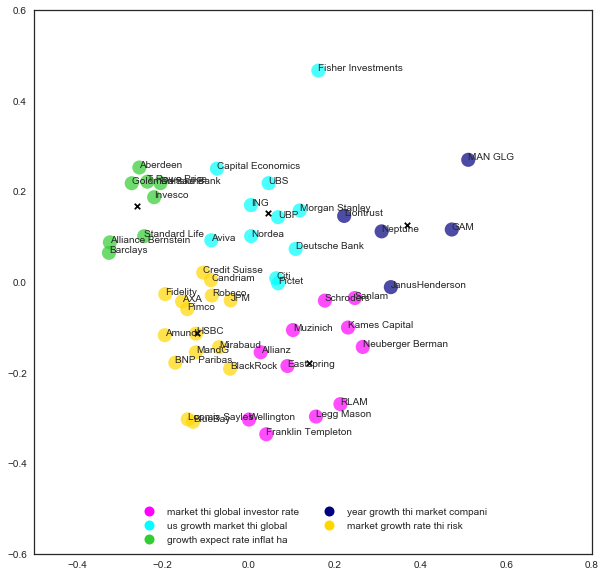

In [50]:
# visualise results

fig = plt.figure(figsize=(10,10))

sns.set_style("white")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(-0.5,0.8)
plt.ylim(-0.6,0.6)
plt.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.scatter(red_df['X'], red_df['Y'], c=red_df['Colour'], marker='o', s=200,
            edgecolors='none', alpha=0.7,label='')
ax2.scatter(c['Centroid_x'], c['Centroid_y'], s=30, c='k', marker="x", label=c['Words'])

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import matplotlib.lines as mlines

line0 = mlines.Line2D([], [], color='magenta', marker='o', markersize=10, linestyle='None',label='')
line1 = mlines.Line2D([], [], color='cyan', marker='o', markersize=10, linestyle='None',label='')
line2 = mlines.Line2D([], [], color='limegreen', marker='o', markersize=10, linestyle='None', label='')
line3 = mlines.Line2D([], [], color='navy', marker='o', markersize=10, linestyle='None', label='')
line4 = mlines.Line2D([], [], color='gold', marker='o', markersize=10, linestyle='None', label='')
line5 = mlines.Line2D([], [], color='darkorange', marker='o', markersize=10, linestyle='None', label='')

ax2.legend([line0, line1, line2, line3, line4, line5],[c for c in c['Words']],
         loc = 'lower center', ncol=2, labelspacing=0.5)

for i in range(len(red_df)):
    ax1.text(red_df.ix[i]['X'], red_df.ix[i]['Y'], red_df.ix[i]['Names'], size=10)  

In [43]:
# use Latent Dirichlet Allocation for topic modelling

from gensim import corpora, models 

#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(clean_stems)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus_lda = [dictionary.doc2bow(text) for text in clean_stems]

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [53]:
# build LDA model

lda = models.LdaModel(corpus_lda, num_topics=5, 
                            id2word=dictionary, 
                            update_every=5, 
                            chunksize=10000, 
                            passes=100)

In [54]:
lda.show_topics()

[(0,
  '0.006*"2" + 0.006*"1" + 0.006*"would" + 0.006*"increas" + 0.006*"hous" + 0.006*"forecast" + 0.005*"0" + 0.005*"3" + 0.005*"gdp" + 0.005*"rise"'),
 (1,
  '0.009*"equiti" + 0.009*"see" + 0.006*"emerg" + 0.005*"u" + 0.005*"return" + 0.005*"bond" + 0.005*"credit" + 0.005*"rise" + 0.005*"cycl" + 0.004*"look"'),
 (2,
  '0.009*"bond" + 0.007*"rise" + 0.007*"credit" + 0.006*"equiti" + 0.005*"corpor" + 0.005*"debt" + 0.005*"earn" + 0.004*"time" + 0.004*"cycl" + 0.004*"level"'),
 (3,
  '0.006*"2" + 0.006*"target" + 0.005*"end" + 0.005*"forecast" + 0.005*"fed" + 0.005*"abov" + 0.005*"still" + 0.004*"rise" + 0.004*"stephan" + 0.004*"hike"'),
 (4,
  '0.005*"synchronis" + 0.003*"constraint" + 0.003*"impuls" + 0.002*"spare" + 0.002*"cylind" + 0.002*"policymak" + 0.002*"overestim" + 0.002*"meanwhil" + 0.002*"amongst" + 0.002*"updat"')]

In [55]:
topics_matrix = lda.show_topics(formatted=True, num_words=10)

topics_matrix
raw = raw_text(topics_matrix)

In [56]:
stuff = ["'", "+", '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '*', '.', '"', ',']

chars = [''.join([char for char in l if char not in stuff]) for l in raw]

topics = pd.DataFrame(chars, columns = ['Words'])

topics

,Words
0,would increas hous forecast gdp ...
1,equiti see emerg u return bond credit ...
2,bond rise credit equiti corpor debt ear...
3,target end forecast fed abov still ri...
4,synchronis constraint impuls spare cylind...


In [57]:
for w in topics.Words:
    print(w)

     would  increas  hous  forecast      gdp  rise
 equiti  see  emerg  u  return  bond  credit  rise  cycl  look
 bond  rise  credit  equiti  corpor  debt  earn  time  cycl  level
   target  end  forecast  fed  abov  still  rise  stephan  hike
 synchronis  constraint  impuls  spare  cylind  policymak  overestim  meanwhil  amongst  updat
